# Analysis of Review Data for Turtle Games

To begin let's review the information provided that we will be using to conduct our analysis:

**Data available:**
- turtle_reviews.csv
  - This data set contains columns:
    - Gender: male or female 
    - age: number
    - remuneration(k£): number
    - spending score (1-100): number
    - loyalty_points: number
    - education: text 
    - language: english
    - platform: Web
    - product: number
    - review: text
    - summary: text


**Main questions for our analysis:**
- How do customers engage with and accumulate loyalty points?
- How can customers be segmented into groups, and which groups can be targeted by the marketing department? 
- How can text data (e.g. social data such as customer reviews) be used to inform marketing campaigns and make improvements to the business?
- Can we use descriptive statistics to provide insights into the suitability of the loyalty points data to create predictive models (e.g. normal distribution, skewness, or kurtosis) to justify the answer.)

## Load and explore the review data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#packages for Linear Regression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import sklearn

#packages for Decision Trees/ Random Forests 
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier  
from sklearn import tree
from sklearn import metrics
from sklearn.tree import _tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

#packages for clustering
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

#packages for NLP
# nltk.download ('punkt').
# nltk.download ('stopwords').
import nltk 
import os 
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter

import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Load the CSV file as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# check for missing values
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Explore the data.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [5]:
reviews.tail()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  
1995  The perfect word game for mixed ages (with Mom  
1996                                       Super fun  
1997                                      Great Game  
1998                                      Four Stars  
1999                                  Love this game

### Drop unneccesary columns

In [6]:
# Drop unnecessary columns.
#The language and platform columns have the same entry for each row so are not needed for analysis
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

### Rename columns

In [7]:
# Rename the column headers.
reviews.columns = ['gender', 'age', 'remuneration', 'spend_score',
       'loyalty_points', 'education', 'product', 'review', 'summary']

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

### Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('reviews_clean.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews_clean.csv')

# View DataFrame.
reviews_clean.head()

gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

# Linear regression
Here we will create various linear regression models aiming to predict customers loyalty points in relation to our other information from our data set. The aim of this is to explore potential solutions to the business question: How do customers engage with and accumulate loyalty points?

### Spend Score vs Loyalty Points

In [10]:
# Define independent variable.
x = reviews_clean['spend_score'].values.reshape(-1, 1) 

# Define dependent variable.
y = reviews_clean['loyalty_points'].values.reshape(-1, 1) 


x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)
# Create model and print summary of metrics.
lm = LinearRegression()

# Fit the model.
lm.fit(x_train, y_train) 

LinearRegression()

In [11]:
# Extract the standard errors.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1299.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          1.09e-208
Time:                        20:07:34   Log-Likelihood:                -13248.
No. Observations:                1600   AIC:                         2.650e+04
Df Residuals:                    1598   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.6222     52.028     -1.569      0.1

R-squared here indicates that the spend score explains about 45% of our dependent variable (loyalty points) and while not especially strong this is still quite significant. This is corroborated as our P>|t| value for x1 is less than 0.05.

This data also shows the coefficient to be negative, which is not possible as loyalty point can not be negative, but this is useful as it does indicate that the loyaly points are not accrued immediately when spending occurs as if this was the case the intercept would be closer to zero. With the coefficient of 33 we can assume that loyalty points begin gathering after spending score is above ~2 _(33 x 2.3 =75.9)_

In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = lm.predict(x_train) 

y_pred
# View the output.

array([[ 812.44395506],
       [1077.35243451],
       [3163.50671024],
       ...,
       [1772.73719309],
       [1607.16939343],
       [1077.35243451]])

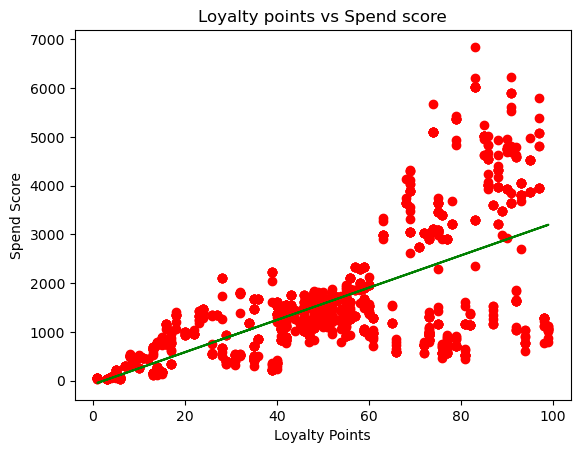

In [13]:
# Plot the graph with a regression line.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'green')

plt.title("Loyalty points vs Spend score")
plt.xlabel("Loyalty Points")
plt.ylabel("Spend Score") 

# Print the graph. 
plt.show()

This predictive graph shows a strong relationship between the data when loyalty points are under 60 but the data becomes more unpredictable after this and seems to vary more greatly.

In [14]:
#test the model
# Predict the test set values.
y_pred_test = lm.predict(x_test) 

print("R-squared value: ", lm.score(x_test, y_test)) 
print("Root Mean Squared Error: ", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),2))

R-squared value:  0.46638946430618866
Root Mean Squared Error:  930.24


### Remuneration vs Loyalty Points

In [15]:
# Define independent variable.
x1 = reviews_clean['remuneration'].values.reshape(-1, 1) 

#y remains the same as above

#split to training and test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y,
                                                    test_size=0.2,
                                                    random_state=42)
# Create model and print summary of metrics.
lm = LinearRegression()

# Fit the model.
lm.fit(x1_train, y1_train) 

LinearRegression()

In [16]:
# Extract the standard errors.
# Fit the model with the added constant.
model = sm.OLS(y1_train, sm.add_constant(x1_train)).fit()

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     1040.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          3.81e-176
Time:                        20:07:34   Log-Likelihood:                -13323.
No. Observations:                1600   AIC:                         2.665e+04
Df Residuals:                    1598   BIC:                         2.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -84.9362     57.498     -1.477      0.1

R-squared for remuneration (~39%) is lower here than above indicating the relationship between remuneration and loyalty points is not as strong as the one between spend score and loyalty points. However it is still significant as we have a P>|t| value of less than 0.05.

In [17]:
# Set the X coefficient and the constant to generate the regression table.
y1_pred = lm.predict(x1_train) 

y1_pred

array([[2404.74321047],
       [1002.50999921],
       [ 573.25493454],
       ...,
       [1231.4460337 ],
       [1231.4460337 ],
       [1946.87114149]])

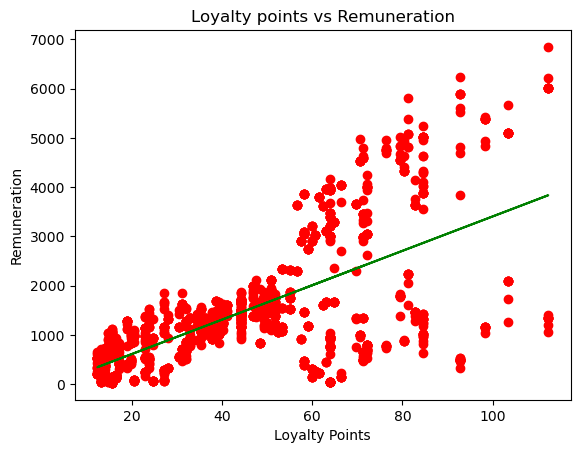

In [18]:
# Set the the X coefficient and the constant to generate the regression table.
# Plot the graph with a regression line.
plt.scatter(x1_train, y1_train, color = 'red')
plt.plot(x1_train, y1_pred, color = 'green')

plt.title("Loyalty points vs Remuneration")
plt.xlabel("Loyalty Points")
plt.ylabel("Remuneration") 

# Print the graph. 
plt.show()

The graph here is similar to the one above for spend score with a slightly larger variation starting a bit earlier.

In [19]:
#test the model
# Predict the test set values.
y1_pred_test = lm.predict(x1_test) 

print("R-squared value: ", lm.score(x1_test, y1_test)) 
print("Root Mean Squared Error: ", round(math.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test)),2))

R-squared value:  0.317948920127035
Root Mean Squared Error:  1051.7


### Age vs Loyalty Points

In [20]:
# Define independent variable.
x2 = reviews_clean['age'].values.reshape(-1, 1) 

#y remains the same 

# Create model and print summary of metrics.
lm = LinearRegression()

# Fit the model.
lm.fit(x2, y) 

LinearRegression()

In [21]:
# Extract the standard errors.
# Fit the model with the added constant.
model = sm.OLS(y, sm.add_constant(x2)).fit()

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)


# Extract the predicted values.
# Print the R-squared value.
print("R-squared: ", lm.score(x2,y))  

# Print the intercept.
print("Intercept: ", lm.intercept_) 

# Print the coefficients.
print("Coefficients:", lm.coef_)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 31 Jan 2025   Prob (F-statistic):             0.0577
Time:                        20:07:34   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

The R squared value here is very low indicating age is not strongly correlating with loyalty points and not a good predictor of  y (loyalty point) values.
The P>|t| value is also above 0.05 and so it does not appear age is statistically significant for loyalty points.

In [22]:
# Set the X coefficient and the constant to generate the regression table.

y2_pred = lm.predict(x2) 

y2_pred

array([[1664.2872467 ],
       [1644.22322095],
       [1648.2360261 ],
       ...,
       [1600.0823643 ],
       [1600.0823643 ],
       [1608.1079746 ]])

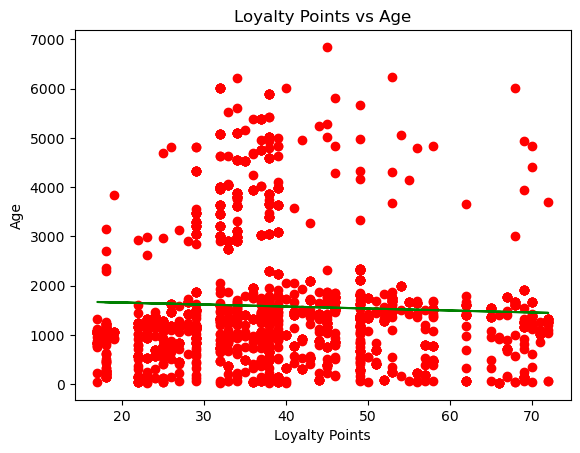

In [23]:
# Plot graph with regression line.
# Set the the X coefficient and the constant to generate the regression table.
# Plot the graph with a regression line.
plt.scatter(x2, y, color = 'red')
plt.plot(x2, y2_pred, color = 'green')

plt.title("Loyalty Points vs Age")
plt.xlabel("Loyalty Points")
plt.ylabel("Age") 

# Print the graph. 
plt.show()

This graph confirms our insights from the statistics above. Age and loyalty points are not correlated and Age would not be a good predictor of loyalty point values.

## Observations and insights from Linear Regression

The individual linear regression models above reveal varying degrees of relationships with loyalty points. 

**Spend score** explains about 45% of the variation in loyalty points, showing a significant relationship with a negative coefficient, suggesting that loyalty points are not accrued immediately after spending, but rather after a certain threshold is reached. The model also indicates that loyalty points are more predictable at lower levels. 

**Remuneration**, with an R-squared of 38%, demonstrates a slightly weaker relationship with loyalty points than spend score, but is still significant. Remuneration has a similar variation at higher values to spend score but it is more pronounced. 

**Age** showed very weak correlation with loyalty points, evidenced by a low R-squared value and a non-significant p-value, indicating that this factor is not a strong predictor of loyalty points.

Considering these results, a multiple linear regression model using both spend score and remuneration would likely provide a more robust prediction of loyalty points, as it would take into account the combined influence of these two factors. This model will be built in R to further refine the analysis and provide more actionable insights.

In [24]:
#check for multicolinearity of these varibles before continuing in R
df_VIF = reviews_clean.drop(columns=['gender', 'age', 'education','loyalty_points', 'product', 'review', 'summary'])
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame containing independent variables
# Add a constant column for intercept
df_VIF = sm.add_constant(df_VIF)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = df_VIF.columns
vif_data["VIF"] = [variance_inflation_factor(df_VIF.values, i) for i in range(df_VIF.shape[1])]

print(vif_data)

        feature       VIF
0         const  8.953952
1  remuneration  1.000032
2   spend_score  1.000032


## Exploring the structure using decision trees

### Load and prepare the data

In [25]:
# Create a new DataFrame.
df2 = pd.read_csv('reviews_clean.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spend_score     2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [26]:
#view the variables in the education column
df2['education'].value_counts() 

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [27]:
#view the variables in the gender column
df2['gender'].value_counts() 

gender
Female    1120
Male       880
Name: count, dtype: int64

In [28]:
# Name new DataFrame and convert categorical variables to dummy variables.
cat_vars=['gender', 'education']

# Use the for loop to specify what actions to apply to all the 'var' items.
for var in cat_vars:  
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df2[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    df2 = df2.join(cat_list) 

# Set a temporary DataFrame and add values.
df2_vars = df2.columns.values.tolist()  

# Indicate what columns are kept.
to_keep = [i for i in df2_vars if i not in cat_vars] 

# Define new DataFrame.
df2_fin = df2[to_keep]  

# Print the column.
df2_fin.columns.values 

array(['age', 'remuneration', 'spend_score', 'loyalty_points', 'product',
       'review', 'summary', 'gender_Female', 'gender_Male',
       'education_Basic', 'education_PhD', 'education_diploma',
       'education_graduate', 'education_postgraduate'], dtype=object)

In [29]:
# Specify Y - dependent variable
y = df2_fin['loyalty_points']
# Specify X - independent variables
X = df2_fin.drop(columns=['loyalty_points','review','summary'])

In [30]:
X.head()

age  remuneration  spend_score  product  gender_Female  gender_Male  \
0   18         12.30           39      453          False         True   
1   23         12.30           81      466          False         True   
2   22         13.12            6      254           True        False   
3   25         13.12           77      263           True        False   
4   33         13.94           40      291           True        False   

   education_Basic  education_PhD  education_diploma  education_graduate  \
0            False          False              False                True   
1            False          False              False                True   
2            False          False              False                True   
3            False          False              False                True   
4            False          False              False                True   

   education_postgraduate  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

### Create train and test data sets.

In [31]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

### Create Decision tree regressor

In [32]:
#Test an unpruned model
#'criterion options: absolute_error', 'poisson', 'squared_error', 'friedman_mse'
regressor1 = DecisionTreeRegressor(criterion = 'poisson', random_state=42)

regressor1 = regressor1.fit(X_train, y_train)

In [33]:
y_pred1 = regressor1.predict(X_test)

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_pred1),2))
print("Mean Squared Error: ", round(metrics.mean_squared_error(y_test, y_pred1),2))
# Calculate the RMSE.
print("Root Mean Squared Error: ", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred1)),2))

Mean Absolute Error:  31.83
Mean Squared Error:  7319.28
Root Mean Squared Error:  85.55


In [34]:
tree_depth = regressor1.get_depth()
print("The depth of the decision tree is:", tree_depth)

The depth of the decision tree is: 23


<Axes: >

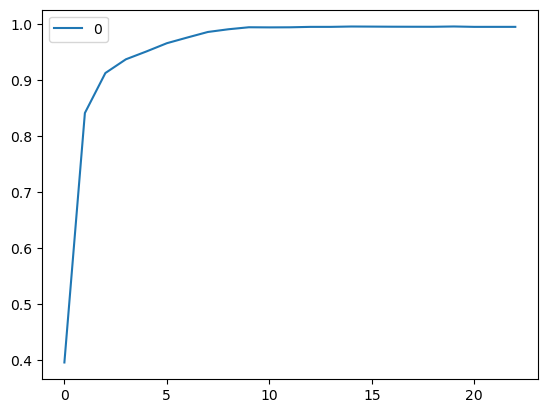

In [35]:
# Prune the model.
# Determine the optimal value for max depth

# List of values to try for max_depth:
max_depth_range = list(range(1, 24))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    dtr = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dtr.fit(X_train, y_train)
    score = dtr.score(X_test, y_test)
    accuracy.append(score)

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot()

In [36]:
# Create your decision tree regressor.
regressor2 = DecisionTreeRegressor(criterion = 'poisson', max_depth = 5, random_state=42)
#'criterion options: absolute_error', 'poisson', 'squared_error', 'friedman_mse'
#poisson yielded the most accurate RMSE value

regressor2 = regressor2.fit(X_train, y_train)

In [37]:
# Evaluate the model.
y_pred2 = regressor2.predict(X_test)

print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_pred2),2))
print("Mean Squared Error: ", round(metrics.mean_squared_error(y_test, y_pred2),2))
# Calculate the RMSE.
print("Root Mean Squared Error: ", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred2)),2))

Mean Absolute Error:  194.55
Mean Squared Error:  83364.9
Root Mean Squared Error:  288.73


### Fit and plot model

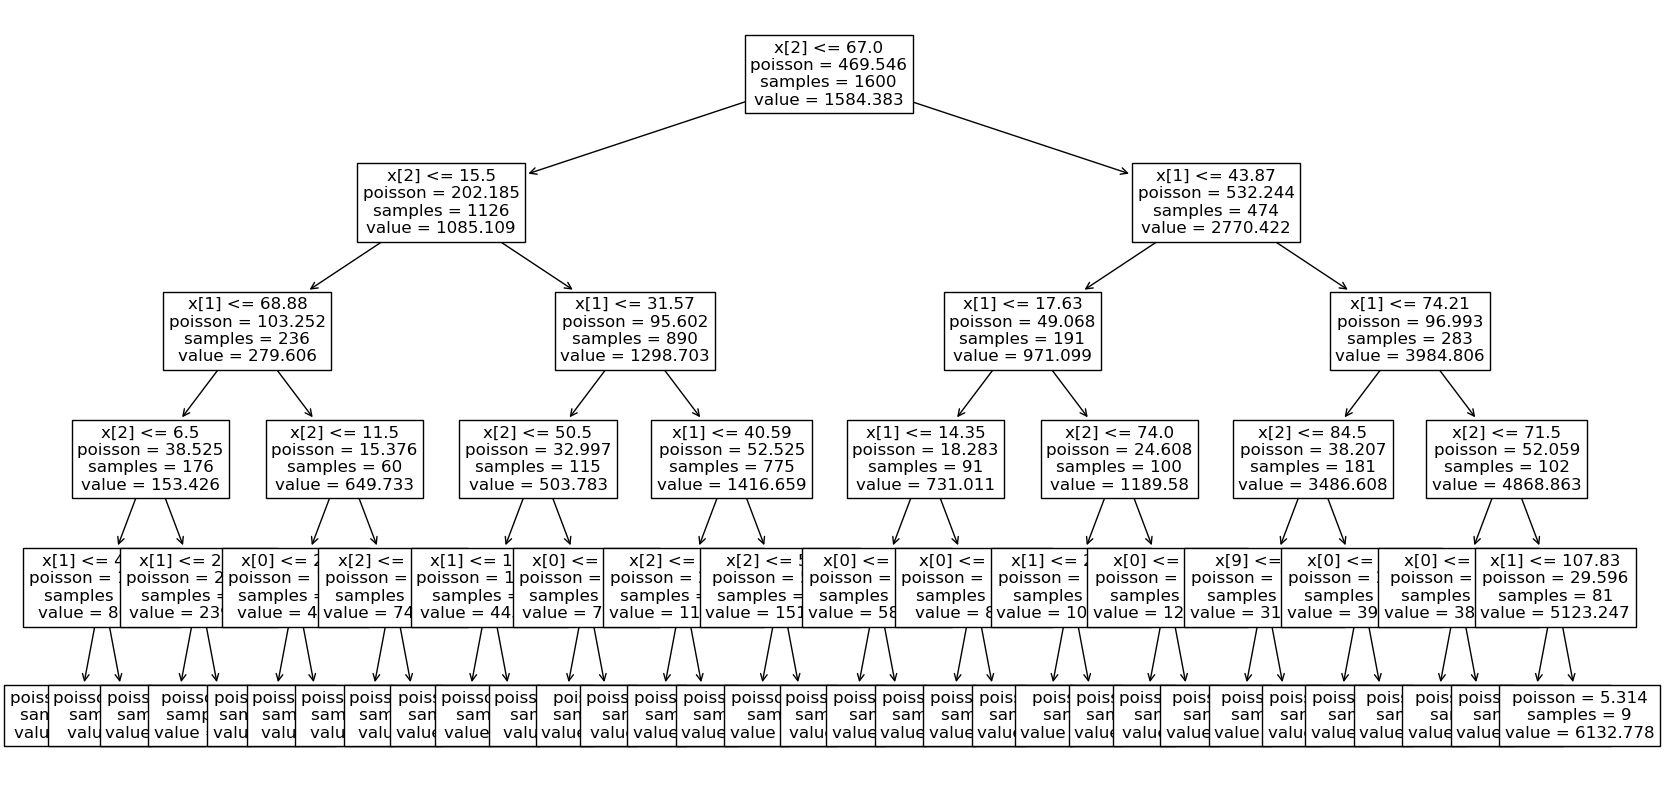

In [38]:
# using unpruned regressor as it has a better RMSE value
# Plot the decision tree to create the visualisation.
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(regressor2, fontsize=12)

# Print the plot with plt.show().
plt.show()  

In [39]:
# Get the tree structure
tree = regressor2.tree_

# Create a DataFrame to hold the node information
node_df = pd.DataFrame({
    'node_id': range(tree.node_count),
    'feature': [X.columns[i] if i != _tree.TREE_UNDEFINED else None for i in tree.feature],
    'threshold': tree.threshold,
    'n_samples': tree.n_node_samples
})

#review the node information in a tabular format
node_df.head()

node_id       feature  threshold  n_samples
0        0   spend_score  67.000000       1600
1        1   spend_score  15.500000       1126
2        2  remuneration  68.879997        236
3        3   spend_score   6.500000        176
4        4  remuneration  43.460000         95

### Insights and observations from Decision Tree Regressor


We can see the top of the decision tree has split the data mainly based on spend score and remuneration. This further solidifies our findings from the linear regression model that these 2 factors are the most significant in determining loyalty points.

We can also see from the models that the RMSE is higher for our pruned model and therefore less accurate but as these values are relatively close and the pruned model is less complex this is the one that has been selected for the final plot.

To see if we can improve upon this we will look at creating a random forest for a potentially more accurate model.

## Fitting a Random Forest

In [40]:
# Create a forest object based on the RandomForestClassifier:
forest = RandomForestClassifier(n_estimators=400, criterion='entropy',
                                class_weight='balanced',
                                min_samples_split=3, min_samples_leaf=4, 
                                max_features='sqrt', bootstrap=True, 
                                n_jobs=1, 
                                random_state=42)


# Train and predict the model:
forest.fit(X_train, y_train)  
y_pred_forest = forest.predict(X_test)

#Review the accuracy of the model
print("Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, y_pred_forest),2))
print("Mean Squared Error: ", round(metrics.mean_squared_error(y_test, y_pred_forest),2))
# Calculate the RMSE.
print("Root Mean Squared Error: ", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)),2))

Mean Absolute Error:  77.94
Mean Squared Error:  47707.14
Root Mean Squared Error:  218.42


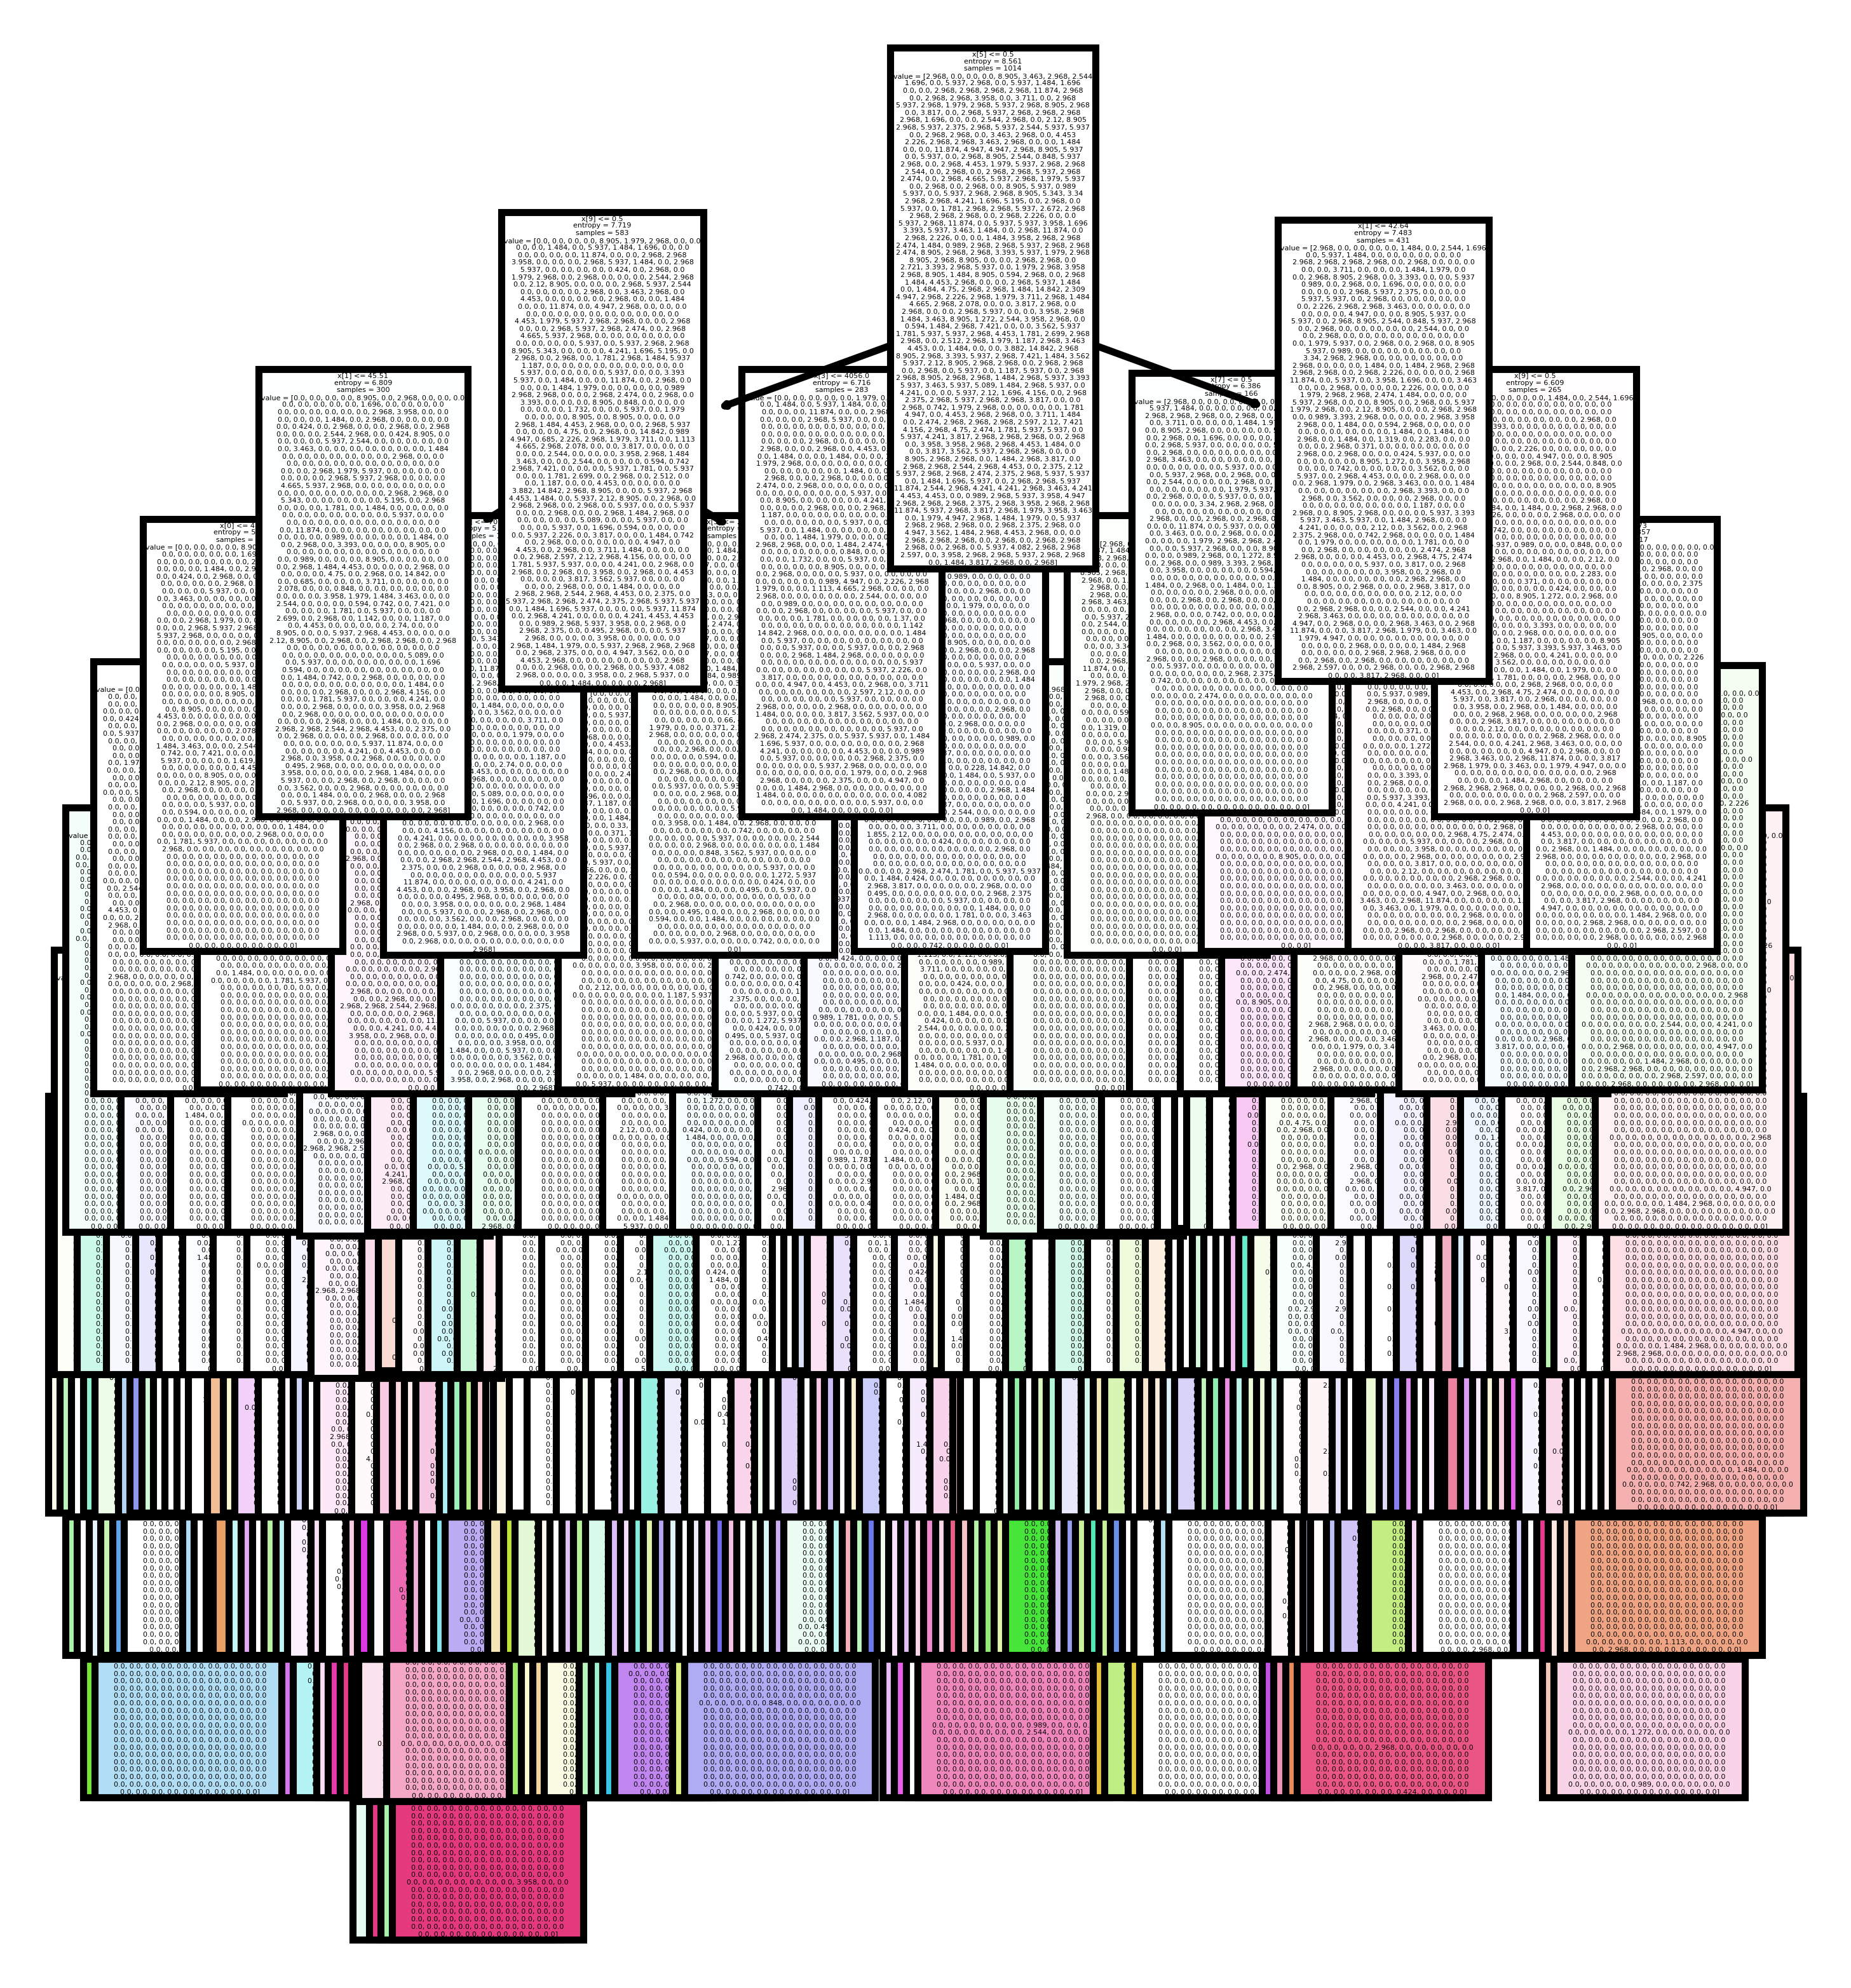

In [41]:
# Plot the decision tree to create the visualisation:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize = (4,4),
                         dpi=800)

plot_tree(forest.estimators_[0],filled = True);

# Print and save the plot.
fig.savefig('rf_individualtree.png')  

This model is still not as accurate as the original unpruned Decision Tree so in this instance _regressor2_ would be the most apt model to consider.

## Clustering with *k*-means using Python
We aim here to investigate solutions to the business question: How can customers be segmented into groups, and which groups can be targeted by the marketing department? 

### Load and explore the data

In [42]:
# Load the CSV file as df3.
df3=pd.read_csv('reviews_clean.csv')

# View DataFrame.
df3.head()

gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [43]:
df3.columns

Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [44]:
# Drop columns unnecessary for clustering
df3 = df3.drop(columns=['gender', 'age', 'loyalty_points',
       'education', 'product', 'review', 'summary'])

# View DataFrame.
df3.head()

remuneration  spend_score
0         12.30           39
1         12.30           81
2         13.12            6
3         13.12           77
4         13.94           40

In [45]:
# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   remuneration  2000 non-null   float64
 1   spend_score   2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [46]:
# Descriptive statistics.
df3.describe()

remuneration  spend_score
count   2000.000000  2000.000000
mean      48.079060    50.000000
std       23.123984    26.094702
min       12.300000     1.000000
25%       30.340000    32.000000
50%       47.150000    50.000000
75%       63.960000    73.000000
max      112.340000    99.000000

### Explore data with plots

<Axes: xlabel='remuneration', ylabel='spend_score'>

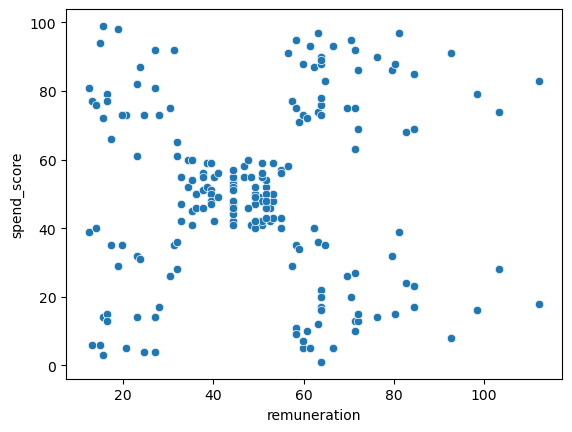

In [47]:
# Create a scatterplot with Seaborn.
sns.scatterplot(df3, x='remuneration', y='spend_score')

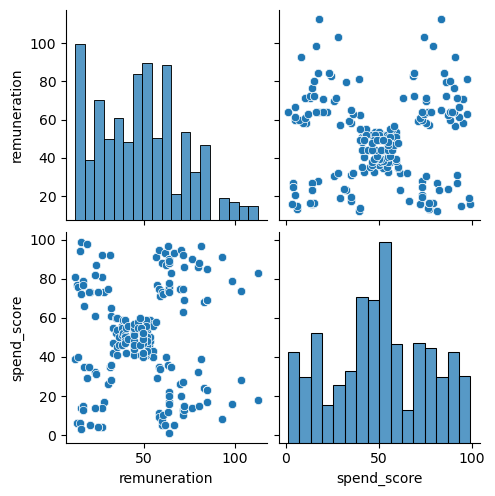

In [48]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)

### Elbow and silhoutte methods

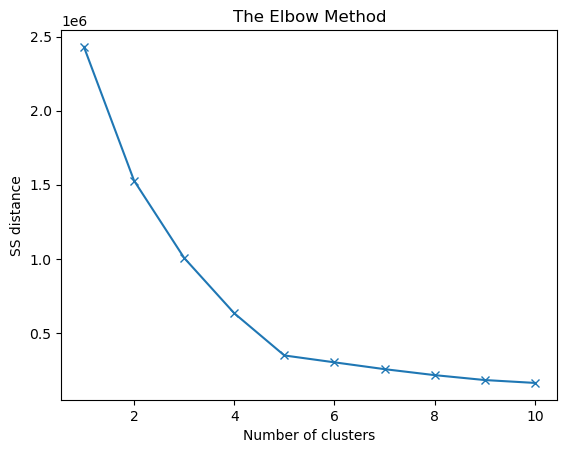

In [49]:
# Determine the number of clusters: Elbow method.

x = df3[['remuneration', 'spend_score']]

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='x')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

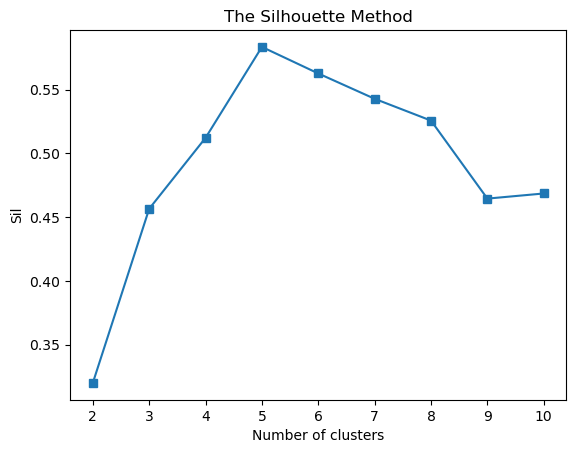

In [50]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='s')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Both the Elbow and silhouette methods show that the optimum k value for this data set would be 5. We can also see this would work well through the scatter plot visualisation where you can see 5 distinct groups.

To be thorough and ensure this is indeed accurate we will review a model with k from 4 to 6 and either confirm or reject this hypothesis.

## Evaluate k-means model at different values of *k*

### Set the clusters to 4

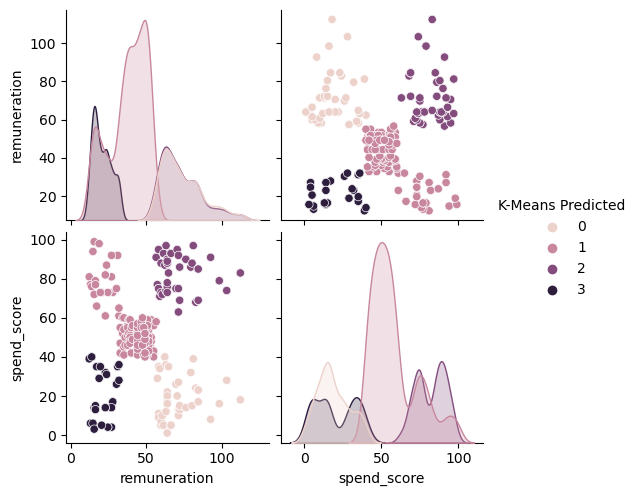

In [51]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [52]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    1013
2     356
0     351
3     280
Name: count, dtype: int64

<Axes: xlabel='remuneration', ylabel='spend_score'>

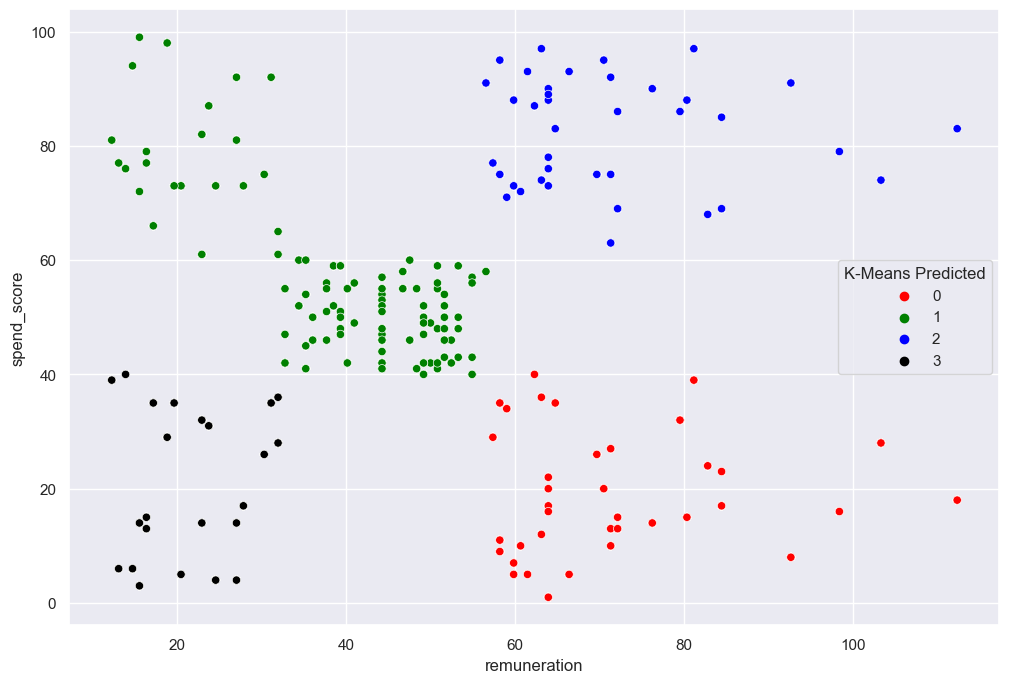

In [53]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spend_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','black'])

### Evaluate the model at k=5

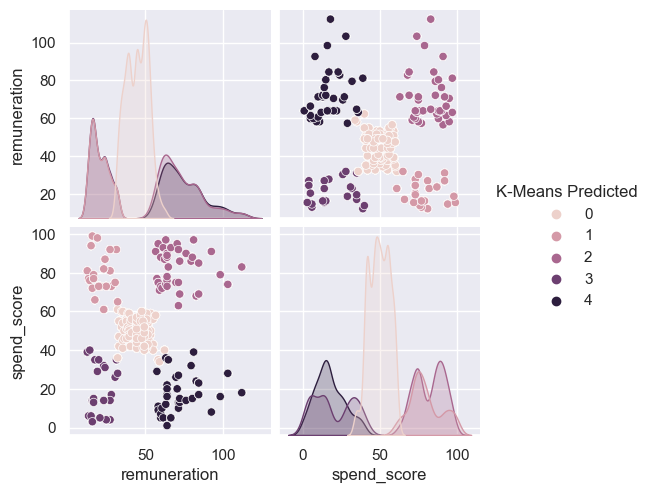

In [54]:
# Use four clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [55]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts().sort_index()

K-Means Predicted
0    774
1    269
2    356
3    271
4    330
Name: count, dtype: int64

Text(0, 0.5, 'Spend Score')

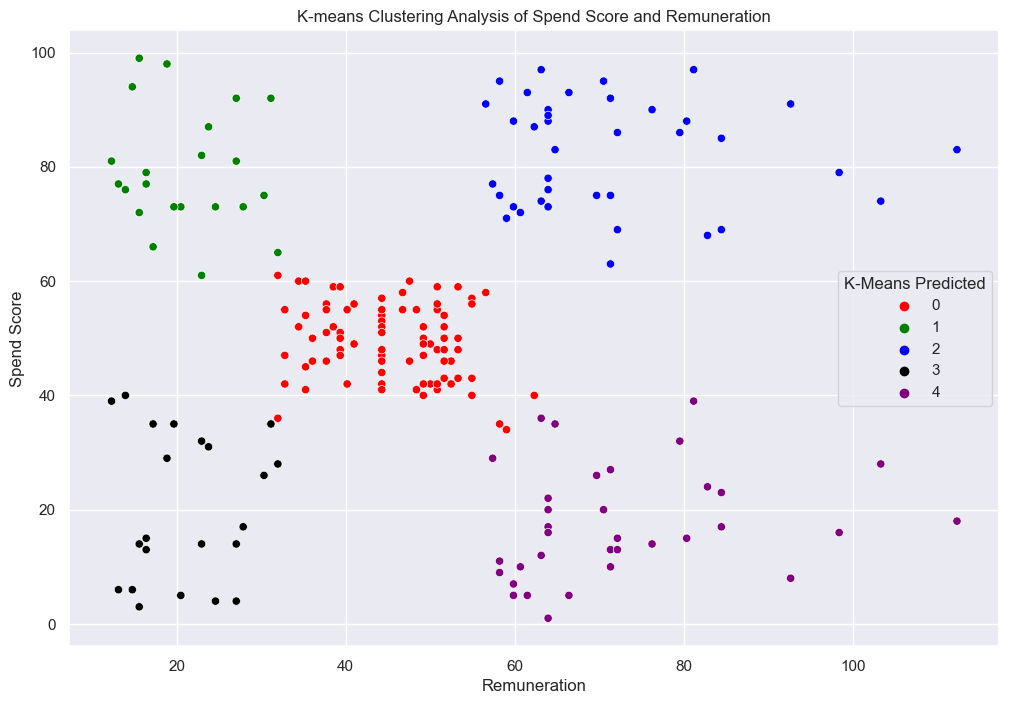

In [56]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spend_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','black','purple'])

plt.title('K-means Clustering Analysis of Spend Score and Remuneration')
plt.xlabel('Remuneration')
plt.ylabel('Spend Score')

### Evaluate the model at k=6

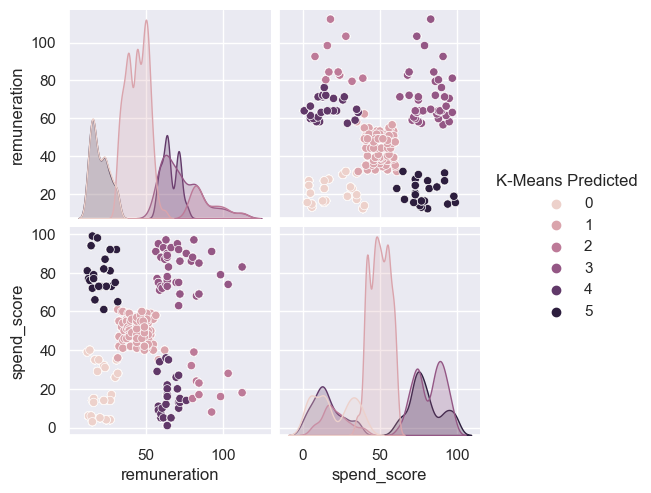

In [57]:
# Use four clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [58]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    767
3    356
0    271
5    269
4    214
2    123
Name: count, dtype: int64

<Axes: xlabel='remuneration', ylabel='spend_score'>

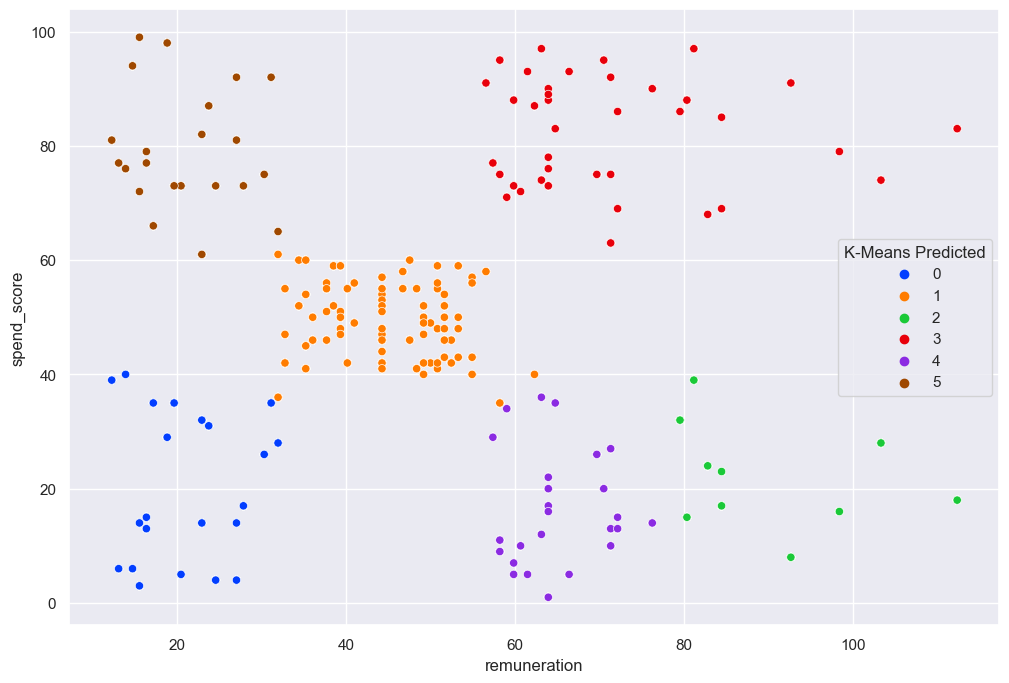

In [59]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spend_score',
                data=x,
                hue='K-Means Predicted',
                palette='bright')

## Fit final model with k=5
## Plot and interpret the clusters

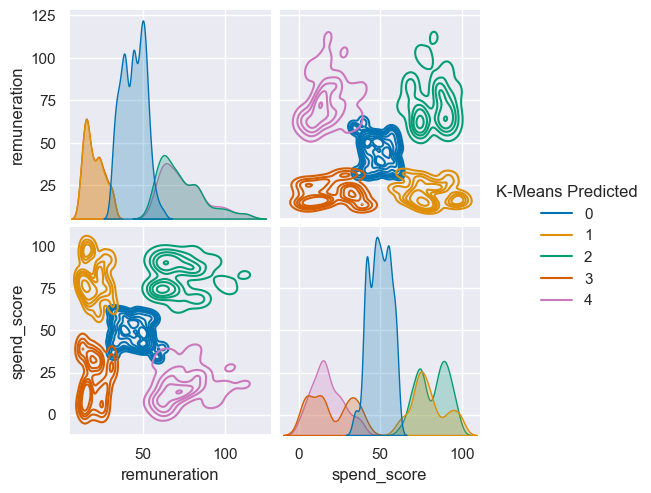

In [60]:
# Visualising the clusters.
# Apply the final model with k=5
kmeans = KMeans(n_clusters =5, max_iter=15000, init='k-means++', random_state =42).fit(x)

clusters=kmeans.labels_

x['K-Means Predicted'] = clusters

sns.pairplot(x, hue = 'K-Means Predicted', kind = 'kde', palette = 'colorblind')

In [61]:
# View the DataFrame.
x.head()

remuneration  spend_score  K-Means Predicted
0         12.30           39                  3
1         12.30           81                  1
2         13.12            6                  3
3         13.12           77                  1
4         13.94           40                  3

### Insights and observations from clustering

We can see from the clustering analysis that there are 5 fairly distinct groups within the customer set for Turtle Games. 

The most prudent method of marketing would be targeting those with higher spend scores, paticularly those with high remuneration for a more likely ROI. Though it is worth noting that from the data we can see those with lower remuneration scores do have a very slighly higher spend score in some cases, evidenced in the above pairplot.

It may also be worth trialling some AB testing for these groups to see if it would be possible to convert a customer from a cluster with a lower spend score to one with a higher score. 

## NLP: Natural Language Processing

## Load and explore the data

In [62]:
# Load the data set as df3.
df4 = pd.read_csv('reviews_clean.csv')

# View DataFrame, check it has been imported correctly
df4.head()

gender  age  remuneration  spend_score  loyalty_points education  product  \
0    Male   18         12.30           39             210  graduate      453   
1    Male   23         12.30           81             524  graduate      466   
2  Female   22         13.12            6              40  graduate      254   
3  Female   25         13.12           77             562  graduate      263   
4  Female   33         13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [63]:
# Keep necessary columns for NLP

df4 = df4[['review','summary']]

# View DataFrame.
df4.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [64]:
#view dataframe in a more readable format for longer text blocks
df4.style.set_properties(subset=['summary'],**{'width': '4000px'})

In [65]:
# Determine if there are any missing values.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## Prepare the data for NLP
### Change to lower case and join the elements in each of the columns respectively (review and summary)

In [66]:
# Review column: Change all to lower case and join with a space.

# Transform data to lowercase.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [67]:
# Summary column: Change all to lower case and join with a space.

# Transform data to lowercase.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Replace punctuation in each column

In [68]:
# Replace all the punctuations in review column.
# Remove punctuation.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [69]:
# Replace all the puncuations in summary column.
# Remove punctuation.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Drop duplicates in both columns

In [70]:
duplicate_reviews = df4[df4.duplicated(subset=['review','summary'], keep=False)]
print(duplicate_reviews)

                                review     summary
48                             love it  five stars
55                              great!  five stars
78                        good product  five stars
94                               great  five stars
294                               good  five stars
326                            love it  five stars
371                             great!  five stars
408                              great  five stars
416                            love it  five stars
430                            love it  five stars
702                        love these!  five stars
810                         great game  five stars
811                         great game  five stars
933                            awesome  five stars
959                            love it  five stars
979                         great game  five stars
1006                        great game  five stars
1037                           awesome  five stars
1144                           

In [71]:
# Drop duplicates in both columns.
df4 = df4.drop_duplicates(subset=['review'])
df4 = df4.drop_duplicates(subset=['summary'])

# Preview data.
df4.reset_index(inplace=True)
df4.tail()

index                                             review  \
1396   1989  this is a fun "card" game for people who like ...   
1397   1990  fun for the family. just make certain you agre...   
1398   1992  great game to keep the mind active. we play it...   
1399   1994  we are retired and find this a great way to st...   
1400   1995  the perfect word game for mixed ages (with mom...   

                                                summary  
1396  this is a fun "card" game for people who like ...  
1397  sort of a card game equivalent of scrabble, an...  
1398                 great game to keep the mind active  
1399                                  a great mind game  
1400     the perfect word game for mixed ages (with mom

In [72]:
#check duplicates have been correctly removed

print(df4.summary.duplicated().sum())

print(df4.review.duplicated().sum())

0
0


## Tokenise and create wordclouds

In [73]:
# Create new DataFrame (copy df4 DataFrame).
word_df = df4.copy()

# View DataFrame.
word_df.head()

index                                             review  \
0      0  when it comes to a dm's screen, the space on t...   
1      1  an open letter to galeforce9*: your unpainted ...   
2      2  nice art, nice printing. why two panels are fi...   
3      3  amazing buy! bought it as a gift for our new d...   
4      4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [74]:
# Apply tokenisation to both columns.

# Tokenise the words.
word_df['tokens_review'] = word_df['review'].apply(word_tokenize)

word_df['tokens_summary'] = word_df['summary'].apply(word_tokenize)

# Preview data.
word_df.head()


index                                             review  \
0      0  when it comes to a dm's screen, the space on t...   
1      1  an open letter to galeforce9*: your unpainted ...   
2      2  nice art, nice printing. why two panels are fi...   
3      3  amazing buy! bought it as a gift for our new d...   
4      4  as my review of gf9's previous screens these w...   

                                             summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1  [an, open, letter, to, galeforce9, *, :, your,...   
2  [nice, art, ,, nice, printing, ., why, two, pa...   
3  [amazing, buy, !, bought, it, as, a, gift, for...   
4  [as, my, review, of, gf9, 's, previous, screen...   

                                      tokens_summary  
0  [the, fact, that, 50, %, of, this, space, is, ...  
1  [another, worthless, dungeon, master, 's, scre...  
2            [pretty, ,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

## Create a word cloud for review column

In [75]:
# Define an empty list of tokens.
all_review_tokens = []

#use a for loop to fill list with review tokens
for i in range(word_df.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + word_df['tokens_review'][i]

##### View Frequecy distribution

In [76]:
# Calculate the frequency distribution.
fdist_rev = FreqDist(all_review_tokens)

# Preview data.
fdist_rev

FreqDist({'.': 5890, 'the': 5130, ',': 3577, 'and': 3028, 'a': 2923, 'to': 2917, 'of': 2325, 'it': 2258, 'i': 2175, 'is': 1692, ...})

##### Remove punctuation and unnecessary characters

In [77]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
review_tokens = [word for word in all_review_tokens if word.isalnum()]

##### Remove stopwords

In [78]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens_2 = [x for x in review_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
review_tokens2_string = ''

#use a for loop to fill string
for value in review_tokens_2:
    # Add each filtered token word to the string.
    review_tokens2_string = review_tokens2_string + value + ' '

##### Create Word cloud for Review column

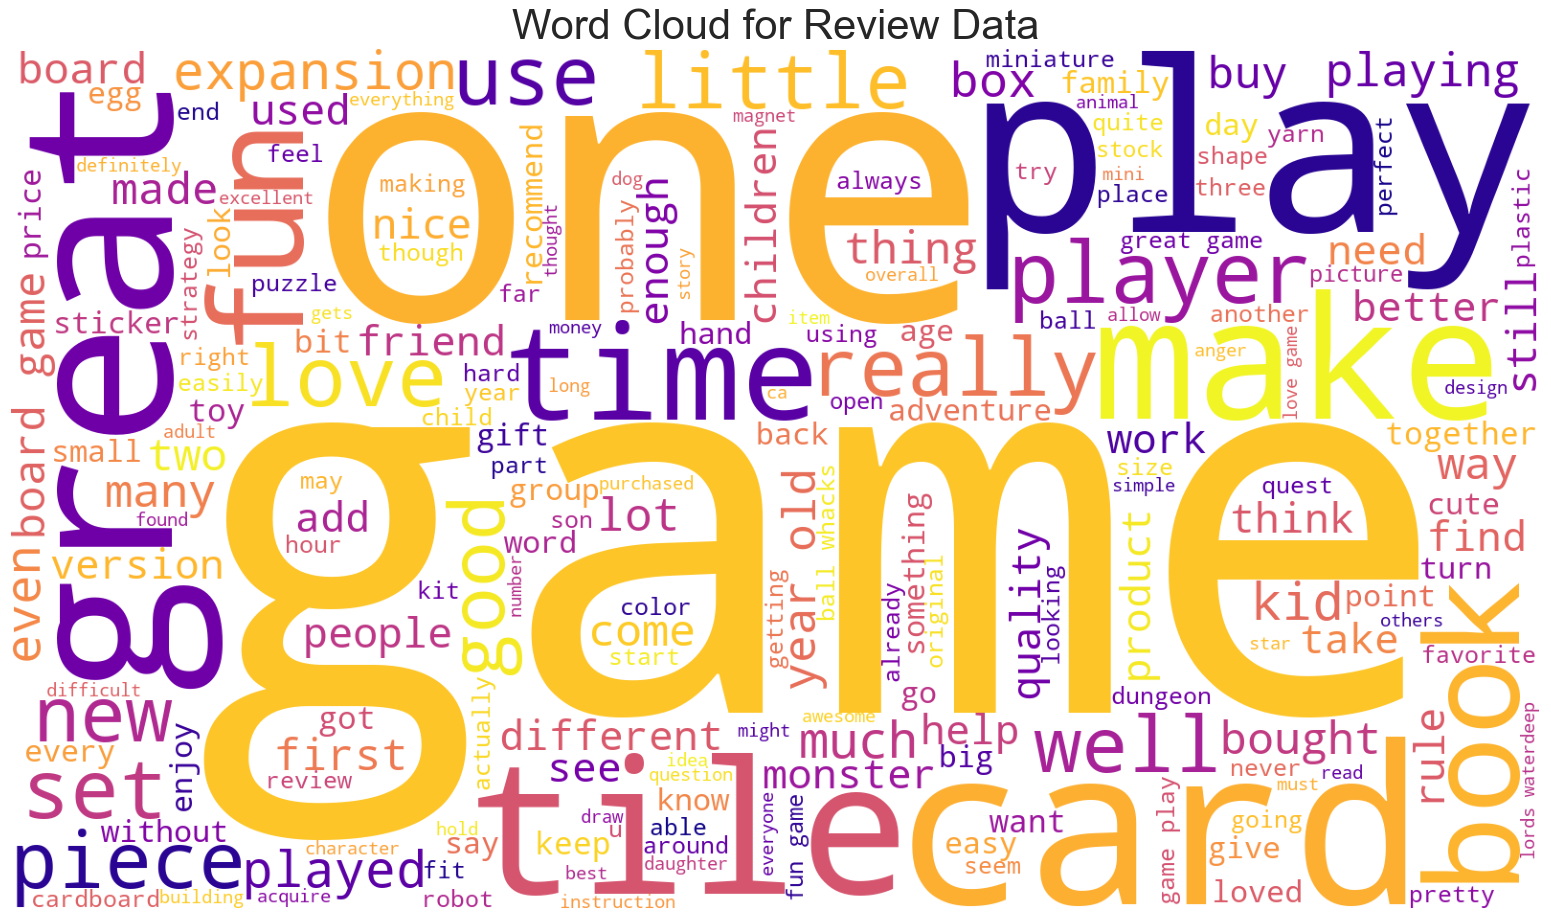

In [79]:
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens2_string) 

# Plot the WordCloud image.  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.title('Word Cloud for Review Data', fontsize=30)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [80]:
#remove the word game
# Create a set of English stopwords.
game = {'game','games'}

# Create a filtered list of tokens without stopwords.
review_tokens_3 = [x for x in review_tokens if x.lower() not in game]

# Define an empty string variable.
review_tokens3_string = ''

#use a for loop to fill string
for value in review_tokens_3:
    # Add each filtered token word to the string.
    review_tokens3_string = review_tokens3_string + value + ' '

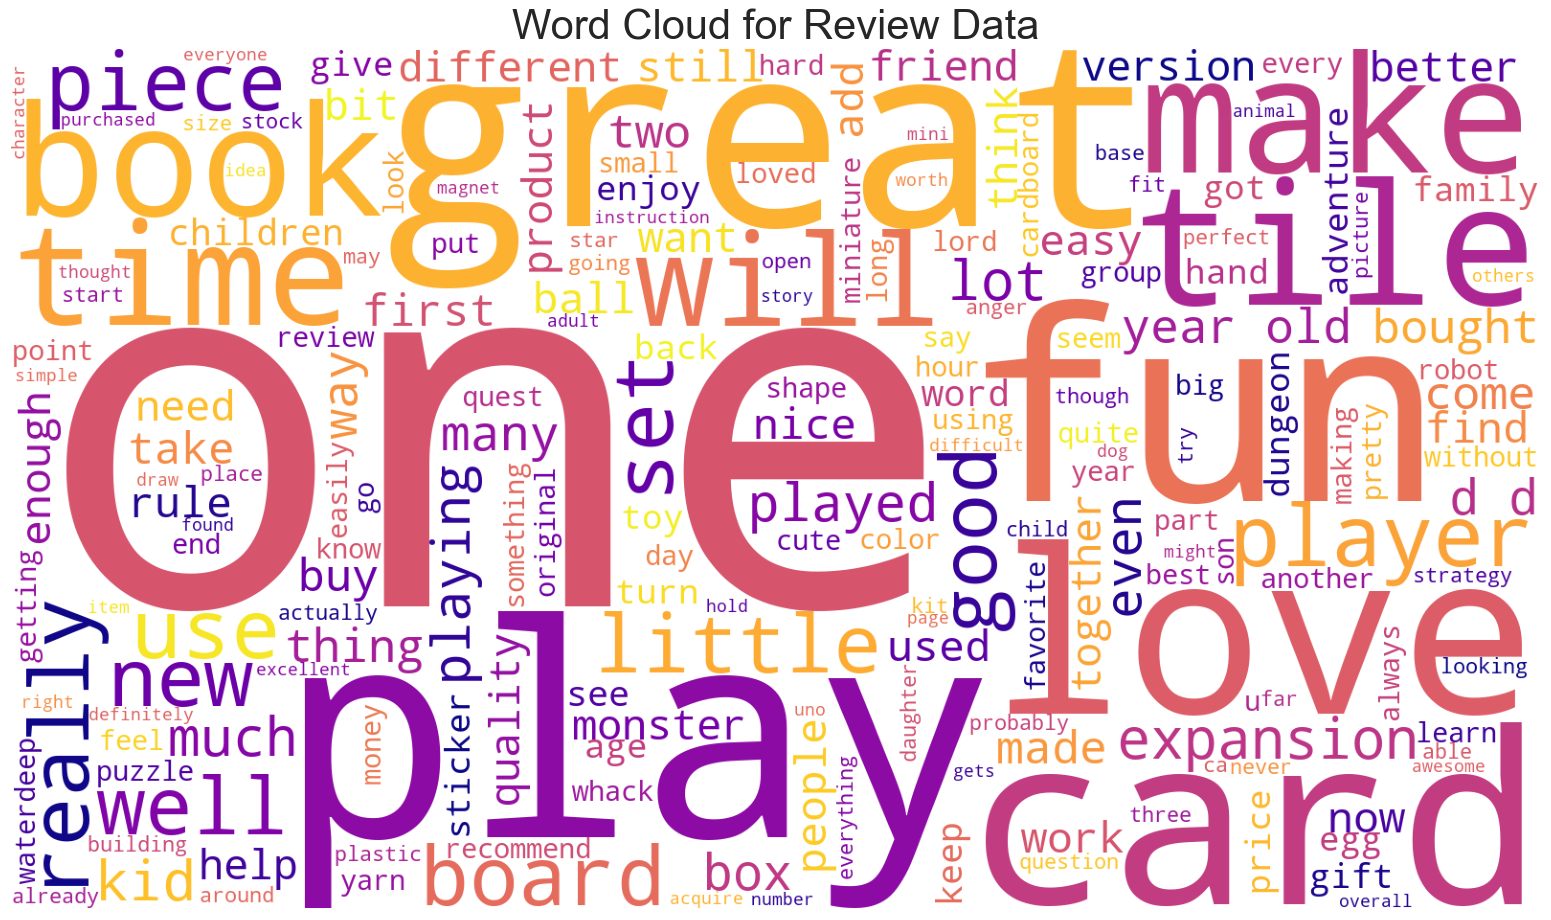

In [81]:
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review_tokens3_string) 

# Plot the WordCloud image.  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.title('Word Cloud for Review Data', fontsize=30)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Create a word cloud for Summary column

In [82]:
# Define an empty list of tokens.
all_summary_tokens = []

for i in range(word_df.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + word_df['tokens_summary'][i]

##### View Frequecy distribution

In [83]:
# Calculate the frequency distribution.
fdist_sum = FreqDist(all_summary_tokens)

# Preview data.
fdist_sum

FreqDist({'!': 389, 'game': 276, 'the': 259, 'great': 250, 'a': 239, 'for': 232, '.': 217, 'to': 192, 'fun': 182, 'it': 177, ...})

##### Remove punctuation and unnecessary characters

In [84]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
summary_tokens = [word for word in all_summary_tokens if word.isalnum()]

##### Remove stopwords

In [85]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
summary_tokens_2 = [x for x in summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens2_string = ''

for value in summary_tokens:
    # Add each filtered token word to the string.
    summary_tokens2_string = summary_tokens2_string + value + ' '

##### Create Word cloud for Summary column

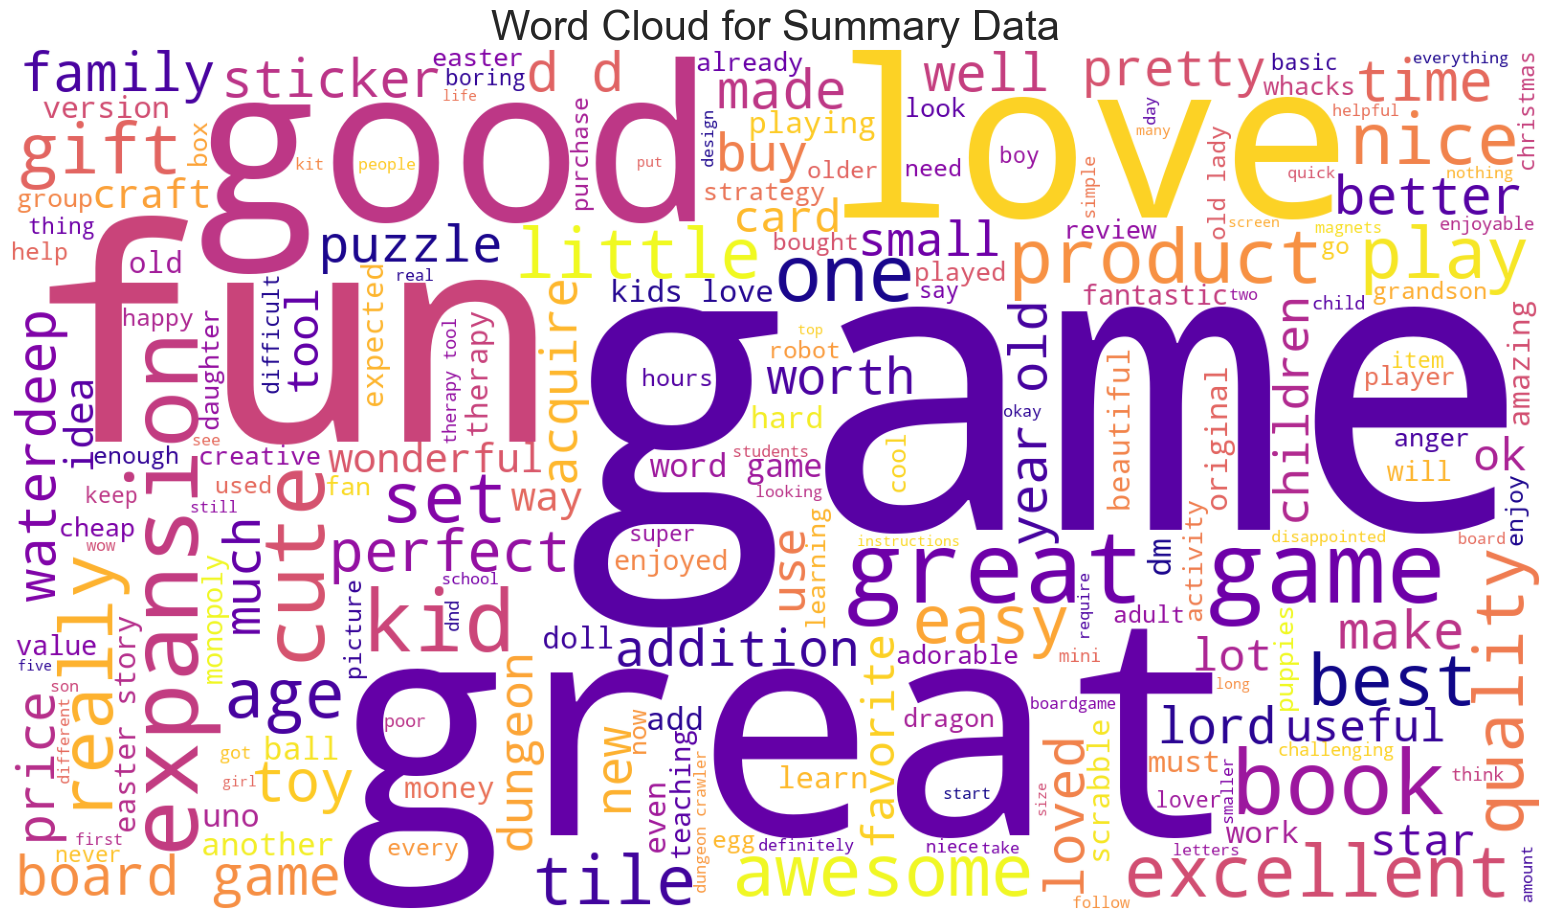

In [86]:
# Review: Create a word cloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.title('Word Cloud for Summary Data', fontsize=30)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## Frequency distribution and polarity
### Create frequency distribution

In [87]:
# Determine the frequency distribution.
#For the Review Column
fdist1_rev = FreqDist(review_tokens_2)

# Preview the data.
fdist1_rev

FreqDist({'game': 1424, 'one': 487, 'play': 455, 'fun': 428, 'great': 419, 'like': 381, 'get': 300, 'cards': 287, 'really': 286, 'tiles': 286, ...})

In [88]:
#For the Summary Column
fdist1_sum = FreqDist(summary_tokens_2)

# Preview the data.
fdist1_sum

FreqDist({'game': 276, 'great': 250, 'fun': 182, 'good': 87, 'love': 79, 'like': 54, 'kids': 50, 'expansion': 44, 'book': 42, 'cute': 41, ...})

### Identify 15 most common words

In [89]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_rev = pd.DataFrame(Counter(review_tokens_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_rev

Frequency
Word             
game         1424
one           487
play          455
fun           428
great         419
like          381
get           300
cards         287
really        286
tiles         286
would         282
book          264
time          252
love          248
well          246

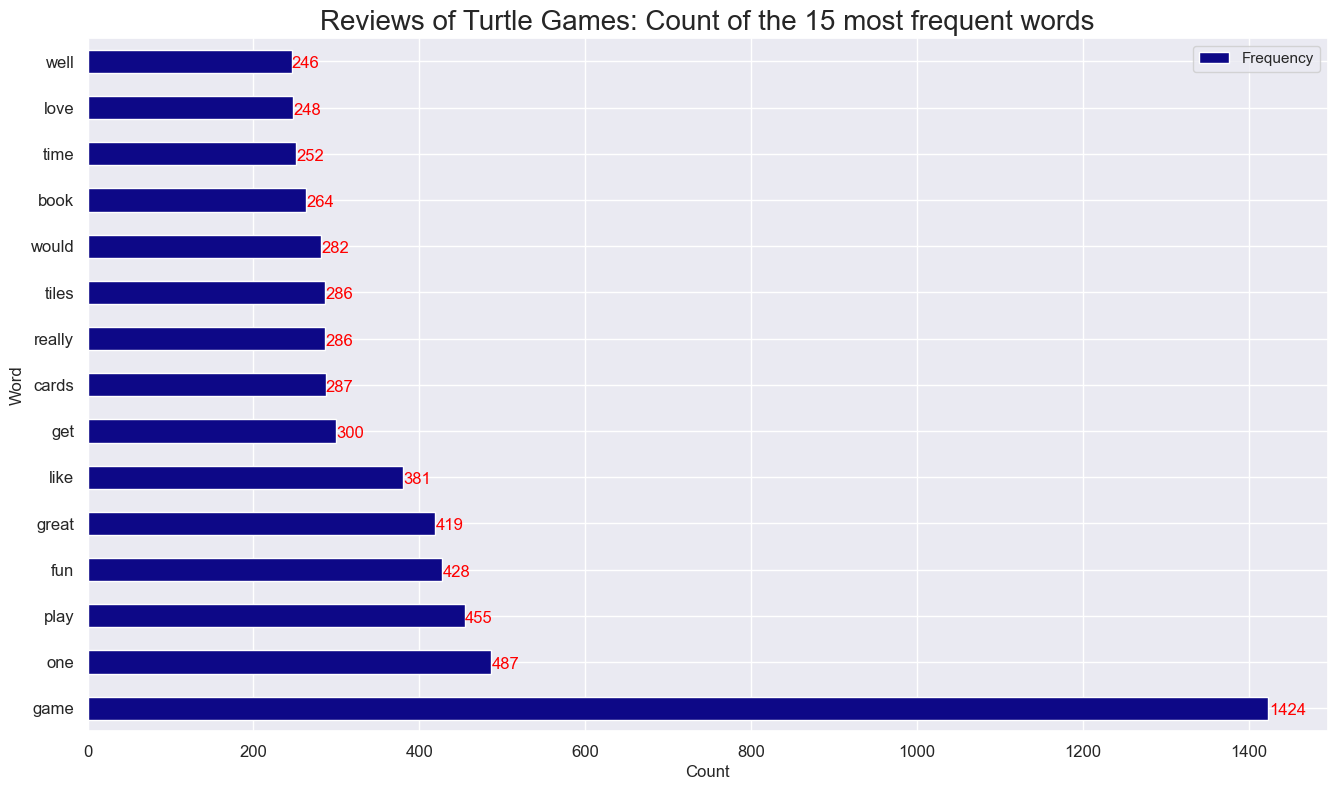

In [90]:
#plot the frequency distribution of top words
# Set the plot type.
ax = counts_rev.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews of Turtle Games: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [91]:
# Generate a DataFrame from Counter.
counts_sum = pd.DataFrame(Counter(summary_tokens_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_sum

Frequency
Word                
game             276
great            250
fun              182
good              87
love              79
like              54
kids              50
expansion         44
book              42
cute              41
old               34
product           30
one               30
really            30
awesome           29

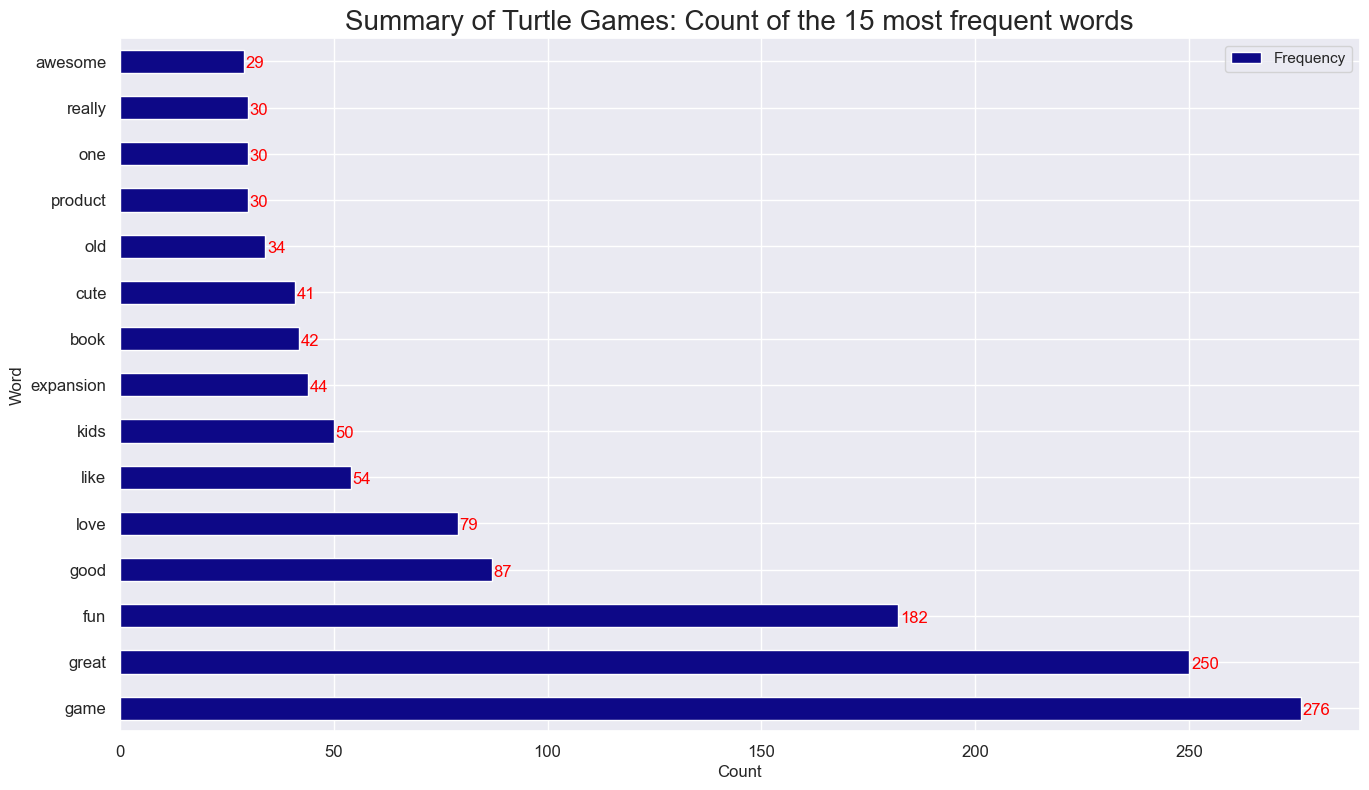

In [92]:
#plot the frequency distribution of top words
# Set the plot type.
ax = counts_sum.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary of Turtle Games: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## Review polarity and sentiment:

In [93]:
# define a function to generate polarity
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [94]:
# define a function to generate subjectivity
def generate_subjectivity(comment):
    '''Extract subjectivity score (0 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [95]:
# Determine polarity of both columns. 
word_df['polarity_review']=word_df['review'].apply(generate_polarity)

word_df['polarity_summary']=word_df['summary'].apply(generate_polarity)

# Determine subjectivity of both columns. 
word_df['subjectivity_review']=word_df['review'].apply(generate_subjectivity)

word_df['subjectivity_summary']=word_df['summary'].apply(generate_subjectivity)

# View output.
word_df.head()

index                                             review  \
0      0  when it comes to a dm's screen, the space on t...   
1      1  an open letter to galeforce9*: your unpainted ...   
2      2  nice art, nice printing. why two panels are fi...   
3      3  amazing buy! bought it as a gift for our new d...   
4      4  as my review of gf9's previous screens these w...   

                                             summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1  [an, open, letter, to, galeforce9, *, :, your,...   
2  [nice, art, ,, nice, printing, ., why, two, pa...   
3  [amazing, buy, !, bought, it, as, a, gift, for...   
4  [as, my, review, of, gf9, 's, previous, screen...   

                                      tokens_summary  polarity_review  \
0  [the, fact, that, 50, %, of, this, space, is, ...        -0.036111   
1  [another, worthless, dungeon, master, 's, scre...         0.035952   
2            [pretty, ,, but, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.628788   
4                                      [money, trap]        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  
0              0.15             0.486111              0.500000  
1             -0.80             0.442976              0.900000  
2              0.00             0.430435              0.733333  
3              0.00             0.784848              0.000000  
4              0.00             0.316667              0.000000

### Plot histograms of polarity and sentiment scores

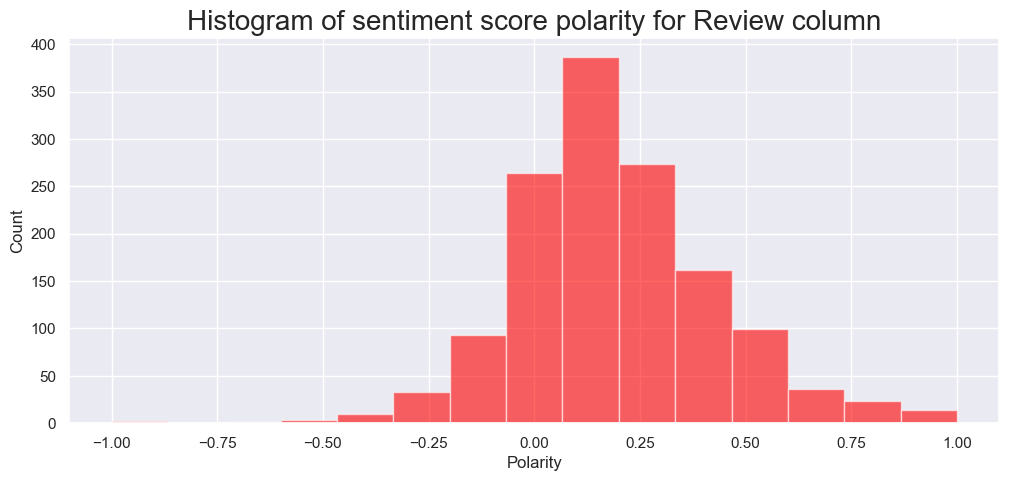

In [96]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

plt.figure(figsize=(12,5))

n, bins, patches = plt.hist(word_df['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Review column', fontsize=20)

plt.show()

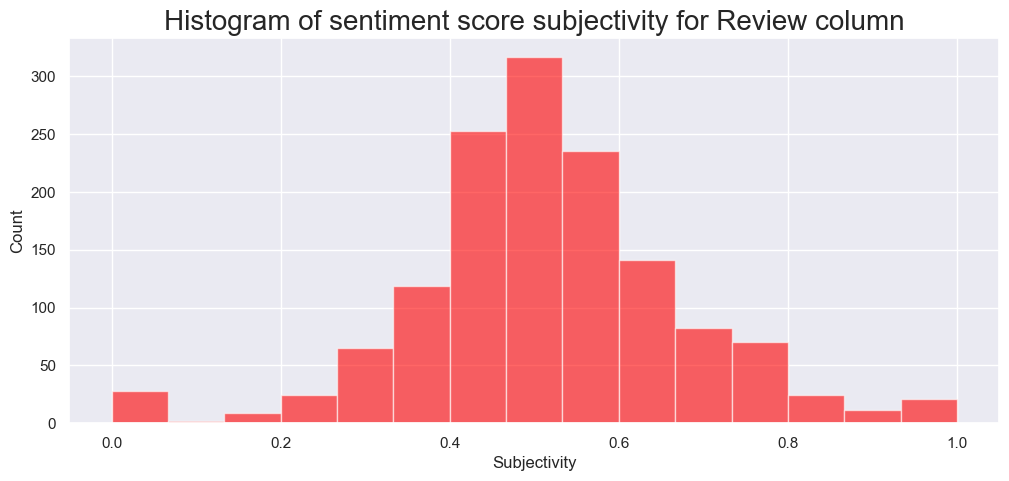

In [97]:
# Histogram of sentiment score
num_bins = 15

plt.figure(figsize=(12,5))

n, bins, patches = plt.hist(word_df['subjectivity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for Review column', fontsize=20)

plt.show()

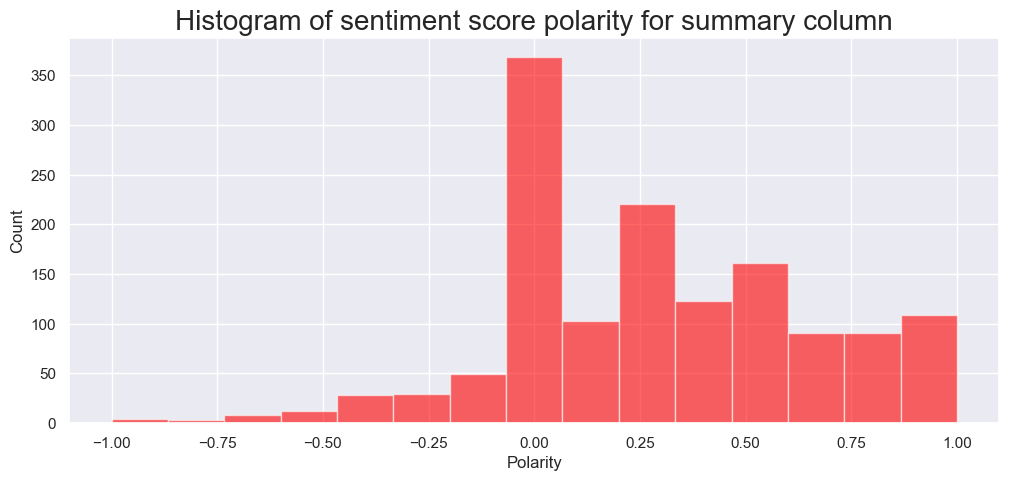

In [98]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

plt.figure(figsize=(12,5))

n, bins, patches = plt.hist(word_df['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary column', fontsize=20)

plt.show()

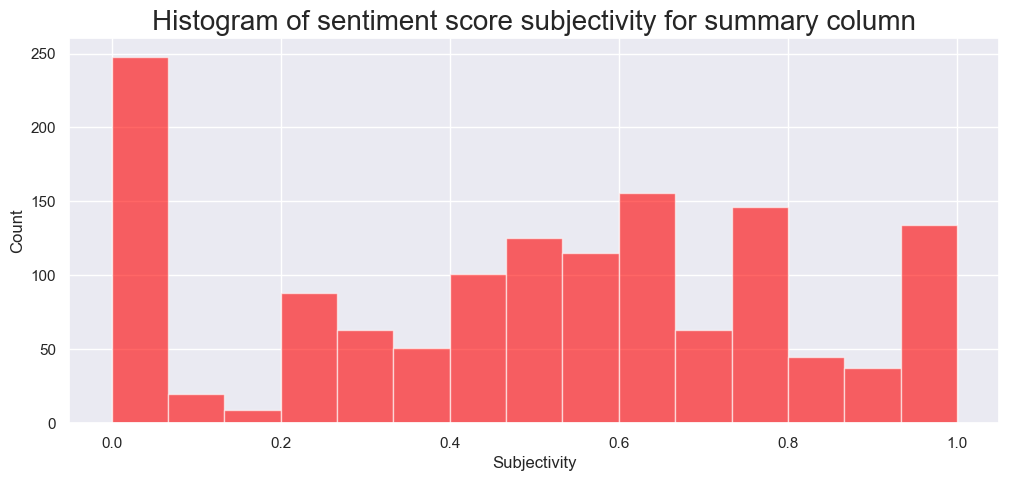

In [99]:
# Histogram of sentiment score
num_bins = 15

plt.figure(figsize=(12,5))

n, bins, patches = plt.hist(word_df['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for summary column', fontsize=20)

plt.show()

## Identify top 20 negative reviews and summaries

In [100]:
# Top 20 negative reviews.
#define new Dataframe for negative sentiment
negative_sentiment_review = word_df.nsmallest(20, 'polarity_review')

#remove unnecessary columns
negative_sentiment_review = negative_sentiment_review[['review','polarity_review','subjectivity_review']]

#adjust comments column for readability
negative_sentiment_review.style.set_properties(subset=['review'],**{'width': '1200px'})

In [101]:
# Top 20 negative summaries.

#define new Dataframe for negative sentiment
negative_sentiment_summary = word_df.nsmallest(20, 'polarity_summary')

#remove unnecessary columns
negative_sentiment_summary = negative_sentiment_summary[['summary','polarity_summary','subjectivity_summary']]

#adjust comments column for readability
negative_sentiment_summary.style.set_properties(subset=['summary'],**{'width': '500px'})


## Identify top 20 positive reviews and summaries

In [102]:
# Top 20 positive reviews.
#extract postitive comments

#define new Dataframe for positive sentiment
positive_sentiment_review = word_df.nlargest(20, 'polarity_review')

#remove unnecessary columns
positive_sentiment_review = positive_sentiment_review[['review','polarity_review','subjectivity_review']]

#adjust comments column for readability
positive_sentiment_review.style.set_properties(subset=['review'],**{'width': '1200px'})


In [103]:
# Top 20 positive summaries.

#define new Dataframe for positive sentiment
positive_sentiment_summary = word_df.nlargest(20, 'polarity_summary')

#remove unnecessary columns
positive_sentiment_summary = positive_sentiment_summary[['summary','polarity_summary','subjectivity_summary']]

#adjust comments column for readability
positive_sentiment_summary.style.set_properties(subset=['summary'],**{'width': '500px'})

## Insights and observations from sentiment analysis

Sentiment indicated by these reviews is mainly positive, even from the frequency distribution we can see that 'fun', 'great' and 'good' are some of the most often mentioned words within reviews.

An idea to inform marketing campaigns would be to identify the most highly reviewed products and create a campaign around these that highlight their best reviews and good feedback.

A review could also be done to see if there is a specific product that has recieved negative reviews and these could then be analysed to improve the product for the future.

### Identify poorly rated products

In [104]:
prod_rev = reviews_clean.copy()

prod_rev.columns

Index(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [105]:
prod_rev = prod_rev.drop(['gender', 'age', 'remuneration', 'spend_score', 'loyalty_points',
       'education'], axis=1)

In [106]:
# Determine polarity of both columns. 
prod_rev['polarity_review']=prod_rev['review'].apply(generate_polarity)

prod_rev['polarity_summary']=prod_rev['summary'].apply(generate_polarity)

# Determine subjectivity of both columns. 
prod_rev['subjectivity_review']=prod_rev['review'].apply(generate_subjectivity)

prod_rev['subjectivity_summary']=prod_rev['summary'].apply(generate_subjectivity)

# View output.
prod_rev.head()

product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  polarity_review  \
0  The fact that 50% of this space is wasted on a...        -0.036111   
1  Another worthless Dungeon Master's screen from...         0.035952   
2                    pretty, but also pretty useless         0.116640   
3                                         Five Stars         0.628788   
4                                         Money trap        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  
0              0.15             0.486111              0.500000  
1             -0.80             0.442976              0.900000  
2              0.00             0.430435              0.733333  
3              0.00             0.784848              0.000000  
4              0.00             0.316667              0.000000

In [107]:
grouped_sum = prod_rev.groupby('product')['polarity_review'].mean().reset_index()\
.sort_values(by='polarity_review', ascending=True)
grouped_sum.head()

product  polarity_review
144     6431         0.001382
93      3436         0.011848
183     9597         0.035130
116     4399         0.036642
76      2795         0.047544

In [108]:
filtered_6431 = prod_rev[prod_rev['product'] == 6431]

filtered_6431

product                                             review  \
179      6431  I double checked the contents to make sure eve...   
378      6431  This is a great resource for kids to help with...   
578      6431  I would like the pidgeon to be a little bigger...   
775      6431  Nothing super fancy about this game but it's s...   
971      6431  Brutal. Awesomely brutal. The mechanics were s...   
1166     6431  before this I hated running any RPG campaign d...   
1360     6431  This has a component that adds corruption for ...   
1553     6431                                        As expected   
1742     6431  My 13 year old grandson loves this ball of wha...   
1951     6431  This has words the Scrabble dictionary doesn't...   

                                                summary  polarity_review  \
179                                      Box wasn't new         0.083333   
378                                          Great game         0.116667   
578   I would like the pidgeon to be a little bigger...         0.184375   
775   A little under impressed, but still an okay game.        -0.024620   
971   The mechanics were simple to learn and the car...        -0.045937   
1166  before this I hated running any RPG campaign d...        -0.133333   
1360                             Corruption for the Win        -0.166667   
1553                                         Five Stars        -0.100000   
1742                                         great gift         0.100000   
1951                                         Five Stars         0.000000   

      polarity_summary  subjectivity_review  subjectivity_summary  
179           0.136364             0.314815              0.454545  
378           0.200000             0.491667              0.575000  
578          -0.093750             0.725000              0.500000  
775           0.228125             0.530810              0.600000  
971           0.216667             0.751820              0.595238  
1166         -0.900000             0.733333              0.700000  
1360          0.800000             0.333333              0.400000  
1553          0.000000             0.400000              0.000000  
1742          0.800000             0.200000              0.750000  
1951          0.000000             0.000000              0.000000

Product 6431 could be used as a starting point to make improvements to poorly rated products

### Identify highly rated products

In [109]:
grouped_sum = prod_rev.groupby('product')['polarity_review'].mean().reset_index()\
.sort_values(by='polarity_review', ascending=False)
grouped_sum.head()

product  polarity_review
175     9119         0.485984
174     9080         0.444396
195    11004         0.411568
87      3158         0.409383
124     4619         0.404173

In [110]:
filtered_9119 = prod_rev[prod_rev['product'] == 9119]

filtered_9119

product                                             review  \
195      9119  It's okay. I would rate it as 10 and up . . . ...   
394      9119  A little expensive, but a helpful therapy tool...   
594      9119  A beautiful story, wonderfully written.  A cla...   
791      9119                                          all good.   
987      9119  Tons of replay value (due to randomized boss e...   
1182     9119                             My grandson loved it!!   
1376     9119  Awesome expansion... If only it would all fit ...   
1569     9119  This is a great party game! Even though there ...   
1758     9119  Bought this for our granddaughter and now I wa...   
1967     9119      Perfect for tutoring my grandson in spelling.   

                                                summary  polarity_review  \
195   it isn't easy to apply the ears and eyes and h...         0.247619   
394               helpful therapy tool for younger kids         0.020833   
594        Good for families with children of all ages.         0.672222   
791                                          Five Stars         0.700000   
987                           Good small group activity         0.029167   
1182                                         Five Stars         1.000000   
1376                                         Five Stars         0.500000   
1569                                  I LOVE this game!         0.273333   
1758                                          Addictive         0.416667   
1967                                           tutoring         1.000000   

      polarity_summary  subjectivity_review  subjectivity_summary  
195           0.433333             0.461905              0.833333  
394           0.000000             0.480952              0.000000  
594           0.700000             0.722222              0.600000  
791           0.000000             0.600000              0.000000  
987           0.225000             0.345833              0.500000  
1182          0.000000             0.800000              0.000000  
1376          0.000000             0.800000              0.000000  
1569          0.000000             0.504444              0.500000  
1758          0.000000             0.500000              0.900000  
1967          0.000000             1.000000              0.000000

The top 5 rated products could be the center of a new ad campaign as the most popular products for turtle games.

A point for further analysis would be to use the clusters from our earlier analysis and identify products that are commonly purchased for this group, then identify on an individual level if this customer had purchased one of these games before and target advertisement for the remaining common games to them.